In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from bs4 import BeautifulSoup
import sys
sys.path.append('..')
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

In [2]:
from src.utils import etl
import importlib
importlib.reload(etl)
scraper = etl.ReviewScraper()

In [3]:
def get_driver(debug=False):
    options = Options()

    if not debug:
        options.add_argument("--headless")
        options.add_argument('--no-sandbox')
    else:
        options.add_argument("--window-size=1366,768")
        

    options.add_argument("--disable-notifications")
    options.add_argument("--lang=en-US")
    driv_path = '../config/webdrivers/chromedriver.exe'
    input_driver = webdriver.Chrome(options=options, executable_path=driv_path)
    return input_driver

In [131]:
def get_rest_info(map_url,place_id,driver):
#     driver = get_driver()
    driver.get(map_url)
    time.sleep(0.5)
    rest_dict = {}
    rest_dict['place_id'] = place_id
    if len(driver.find_elements_by_xpath('//button[@jsaction=\'pane.rating.category\']')) > 0:
        rest_dict['rest_type'] = (driver.find_elements_by_xpath('//button[@jsaction=\'pane.rating.category\']')[0].text)
    else:
        rest_dict['rest_type'] = None
    resp = BeautifulSoup(driver.page_source, 'html.parser')
    if len(resp.find_all('div', class_='section-editorial-quote')) >0:
        rest_dict['rest_desc'] = resp.find_all('div', class_='section-editorial-quote')[0].text
    else:
        rest_dict['rest_desc'] = None

    attr = resp.find_all('div', class_='section-editorial-attribute-container')
    if len(attr)>0:
        attrs_list = ((attr[0].text.split('  ·  '))[1:])
        attrs = [(re.sub(r"^\s+|\s+$", "", s)) for s in attrs_list]
#         print(attrs)
        for attrib in attrs:
            rest_dict[attrib] = 1
    else:
        rest_dict['attr'] = None
    
    return pd.DataFrame([rest_dict])
    

In [ ]:
dpath = '../data/outputs/'+'cbg_restaurants/'
driver = get_driver()
file_list = [dpath+ f for f in os.listdir(dpath)][:-1]
df_rest_type = pd.read_json('../data/spark/rest_descr.json')
for file in file_list[1728:]:
    df = pd.read_json(file)
    for idx,i in df.iterrows():
#         df_res
        cbg, rest_name,rest_add,place_id = i['CBG'],i['name'],i['vicinity'],i['reference']
        if place_id not in df_rest_type['place_id'].unique():
            url = 'https://www.google.com/search?q=' + rest_name + ' ' + rest_add


            driver.get(url)
            response = BeautifulSoup(driver.page_source, 'html.parser')

            for res in response.find_all('a', href=True):
                if 'maps.google' in res['href']:
                    map_url  = res['href']
            df_rest_type = df_rest_type.append(get_rest_info(map_url,place_id,driver),ignore_index=True)
            df_rest_type.to_json('../data/spark/rest_descr.json',indent=6,orient='records')




In [101]:
''.strip()

''

In [91]:
df_rest_type

,place_id,rest_type,rest_desc,Takeout,Delivery,Dine-in,Curbside pickup,No-contact delivery
0,ChIJ1SMLTkG2t4kRk_iwegm5j84,American restaurant,None,1.0,1.0,NaN,NaN,NaN
1,ChIJFaK2ddS3t4kR4LLXUHpoLC0,Coffee shop,"Pizza, all-day breakfast & more gourmet diner...",NaN,1.0,1.0,1.0,NaN
2,ChIJCSp15dS3t4kRkyCKVSBMyDo,Restaurant,"This upscale, modern American steakhouse serv...",1.0,1.0,NaN,NaN,NaN
3,ChIJRT4d_MjJt4kROpi05BBgDY0,Restaurant,"Pasta, pies & panini presented in casual surr...",1.0,NaN,1.0,NaN,1.0
4,ChIJO_4WddS3t4kRJY1U7aZhQLQ,American restaurant,Longtime DC go-to for New American fare in Ar...,NaN,1.0,NaN,NaN,NaN
5,ChIJbalqFtS3t4kRhnTTAflne7o,Lebanese restaurant,Local chain serving a menu of traditional Leb...,1.0,1.0,1.0,NaN,NaN


In [35]:
driver.get(map_url)

In [34]:
print(map_url)

https://maps.google.com/maps?q=Glover+Park+Grill+2505+Wisconsin+Avenue+Northwest,+Washington&um=1&ie=UTF-8&sa=X&ved=2ahUKEwih1Nra0fzvAhXBGFkFHbAFBKMQ_AUoAXoECAEQAw


In [36]:

resp = BeautifulSoup(driver.page_source, 'html.parser')


In [52]:
resp.find_all('div', class_='section-editorial-attribute-container')[0].text.split('  ·  ')

['', 'Dine-in', 'Curbside pickup', 'No-contact delivery  ']

In [51]:
for res in resp.find_all('div', class_='section-editorial-attribute-container'):
    print(res.text.split('  ·  '))

['', 'Dine-in', 'Curbside pickup', 'No-contact delivery  ']


In [12]:
print(map_url)

https://maps.google.com/maps?q=Bulldog+Tavern+Georgetown+University,+205+Prospect+Street+Healey+Family+Student+Center,+Washington&um=1&ie=UTF-8&sa=X&ved=2ahUKEwif2PfgzPzvAhUrFlkFHffJDXMQ_AUoAXoECAEQAw


In [15]:
driver.find_elements_by_xpath('//button[@jsaction=\'pane.rating.category\']')[0].text

'American restaurant'

<html itemscope="" itemtype="http://schema.org/Place" jstcache="0" lang="en"><head> <link href="/maps/preview/opensearch.xml?hl=en" rel="search" title="Google Maps" type="application/opensearchdescription+xml"/> <title>Bulldog Tavern - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description"/> <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/> <meta content="chrome=1" http-equiv="X-UA-Compatible"/> <meta content="notranslate" name="google"/> <meta content="origin" name="referrer"/> <meta content="Google Maps" itemprop="name"/> <meta content="Google Maps" property="og:title"/> <meta content="https://maps.google.com/maps/api/staticmap?center=38.90615588%2C-77.07627148&amp;zoom=17&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=YGgXP_14d8OXJlxtH2JdsZiP8GI" itemprop="image"/> <meta content="https://maps.google.c
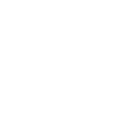
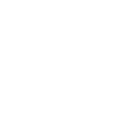

In [13]:
resp.find('button', class_='section-review-action-menu')['data-review-id']